<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
<font face='Liberation serif' size=3>
    
#### **Привет, Павел!** 👋

Меня зовут Артём Пиляй. Я буду проверять твой проект «*Исследование A/B-тестирования нового алгоритма рекомендаций в развлекательном приложении*» 📱.

---

В рамках корпоративной этики мы общаемся на «ты». Но если лучше на «Вы», то важно обозначить это сразу.

---

Комментарии к проекту размещены в отдельных ячейках Markdown. Для удобства они отображаются в меню **Contents** слева. 

Я использую четыре типа комментариев:

---

✅ Главый комментарий — значит, всё сделано хорошо. А ещё здесь могут быть подсказки, как улучшить проект.

---

⚠️ Рекомендуемый к исправлению — лучше внести правки, хотя это не критично для текущего проекта. Но начиная со следующего проекта такие комментарии будут считаться критическими.

---

⛔ Обязателен к исправлению — важный комментарий, который нужно доработать, чтобы проект прошёл проверку.

---

🚩 Красный флаг — проверку пришлось прервать, так как действие в ячейке выше повлияло на весь дальнейший проект.
    
<br>    

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

Важно! Не перемещай и не удаляй мои комментарии. Если они будут удалены, я верну последнюю версию проекта, где они сохранились.

</div>

🏁 [Перейти к итогам ревью](#results)

<a id="start"></a>

# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-11 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Вводная часть

---
    
✅ Отлично, что уже есть вводная часть написанная в шаблоне.

---

⚠️ Еще можно раскрыть особенности А/В теста — изменение какой метрики ожидается, какие другие метрики будут также тестироваться и какой ожидаемый эффект
    
Это небольшое улучшение, которое сделают проект более презентабельным и понятным для заказчика. 😉    
    
---
    
💬 На будущее учту этот момент
    
---
    
✅ Хорошо, это поможет выделить твою работу среди других.    

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
# Импортируем необходимые модули
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import ceil
# Модули для проведения тестов
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Задаем расположение данных в сети
PATH = 'https://code.s3.yandex.net/datasets/'
# Загружаем данные
sessions_history  = pd.read_csv (PATH + 'sessions_project_history.csv' ) 

# Выводим первые строки датафрейма на экран
display(sessions_history.head(5))

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    
##### ✅ Python Enhancement Proposal №8.
    
---    

⚠️ Я понимаю, что в прекоде импорты идут дальше, но согласно руководству PEP 8 лучше:
- ❌ отделять импорт от основного кода;
- ✅ импортировать все библиотеки в одной ячейке в начале проекта.  

Это делает код более структурированным и понятным.

Это помогает:
- Сразу видеть, какое окружение необходимо для запуска проекта.
- Избежать дублирования импортов в разных частях кода.
- Облегчить отладку и переносимость проекта.
    
Подробнее о PEP 8 можно прочитать в статье [*PEP 8 - руководство по написанию кода на Python*](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html).    
    
---
    
💬 Так и делал всегда. В этот раз что то пропустил.
Исправил
    
---
    
✅ Отлично.    

#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [3]:
# Определяем пользователя с наибольшим кол-вом сессий и запоминаем его user_id
user_session_high = sessions_history['user_id'].value_counts().idxmax()
# Выводим данные таблицы для пользователя с наибольшим кол-вом сессий
display(sessions_history[sessions_history['user_id']==user_session_high])

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Знакомство с данными

---    
    
✅  В таких случаях можно использовать `.value_counts().idxmax()`, чтобы динамически определять наиболее частый `user_id`.

`idmax` помогает упростить и ускорить анализ данных.

Преимущества метода:
- Оптимизация кода — сокращает количество вычислений по сравнению с альтернативными методами.
- Быстродействие — позволяет находить нужное значение без дополнительной сортировки.
- Читаемость — код становится лаконичным и понятным.
- Эффективность — снижает нагрузку при обработке больших объемов данных.

Подробнее можно ознакомиться в документации по Pandas: [Pandas idxmax()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html)

---

💬 Спасибо. Незнал о таком методе. 

Исправил
    
---
    
✅ Рад рассказать что-то новое.    

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [4]:
# Группируем данные по дате сессии для зарегестрированных пользователей
user_registration = sessions_history.groupby('session_date')['user_id'].nunique().to_frame()
user_registration['user_registration'] = sessions_history[sessions_history['registration_flag']==1].groupby('session_date')['user_id'].nunique().to_frame()

# переименовываем столбец
user_registration = user_registration.rename(columns={'user_id': 'user_all'})
# Добавляем столбец с расчетом доли зарегестрированных пользователей
user_registration['user_share'] = user_registration['user_registration']/user_registration['user_all']

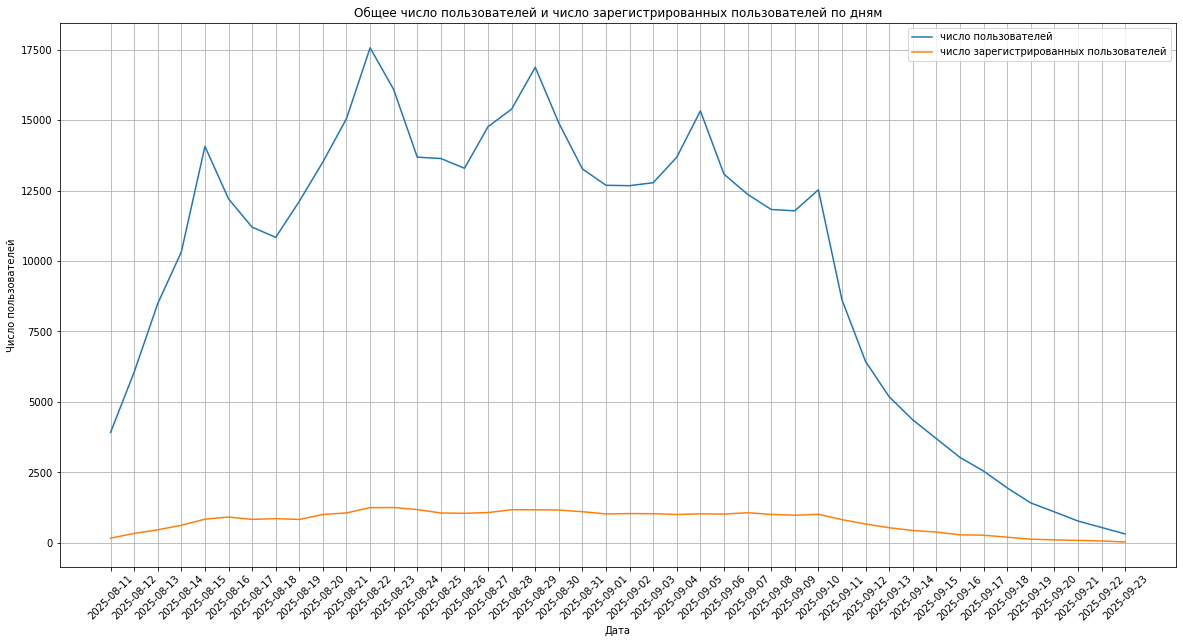

In [5]:
#Строим диаграмму кол-ва пользователей
plt.figure(figsize=(20,10))
x = user_registration.index
y_a= user_registration['user_all']
y_b = user_registration['user_registration']
plt.plot(x,y_a, label= 'число пользователей')
plt.plot(x,y_b, label= 'число зарегистрированных пользователей')
plt.xlabel('Дата')
plt.ylabel('Число пользователей')
plt.title('Общее число пользователей и число зарегистрированных пользователей по дням')
plt.xticks(rotation=45)
plt.grid(True) 
plt.show
plt.legend()

**По графику выше можно сделать вывод о том, что количество зарегестрированных пользователей очень маленькое в течение всего периода по сравнению с общим числом пользователей и также наблюдается одновременное снижение с 10-09-2025 количества как общего числа пользователей, так и зарегестрированных пользователей.**

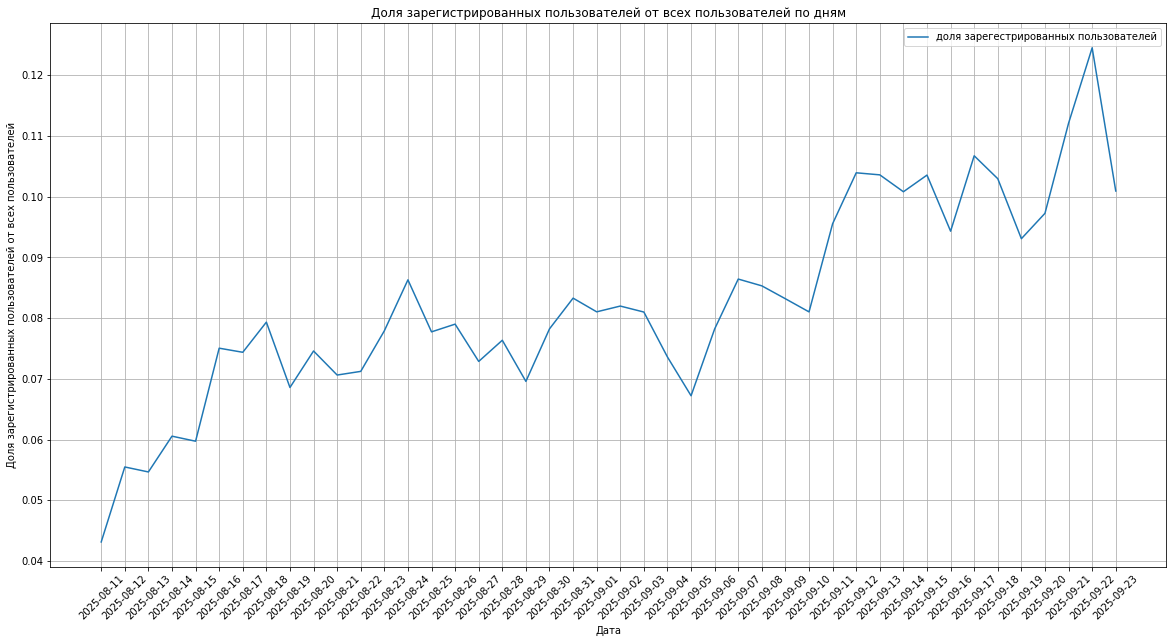

In [6]:
#Строим диаграмму доли зарегестрированных пользователей
plt.figure(figsize=(20,10))
x = user_registration.index
y= user_registration['user_share']
plt.plot(x,y, label= 'доля зарегестрированных пользователей')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных пользователей от всех пользователей')
plt.title('Доля зарегистрированных пользователей от всех пользователей по дням')
plt.xticks(rotation=45)
plt.grid(True) 
plt.show
plt.legend()

**Глядя на долю зарегестрированных пользователей следует отметить резкие колебания в течение исследуемого периода и особенно резкое увеличение с 17 сентября 2025 года, а затем резкое снижение после 22 сентября 2025 г.**

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Анализ числа регистраций

---

✅ Расчет числа регистраций выполнен верно. 

---    
    
⚠️ Но нет самого анализа — цель шага «Анализ числа регистраций» не достигнута. Представлен только код, но не сделаны выводы. Лучше добавить хотя бы 2–3 предложения с интерпретацией — например, как менялось число регистраций, есть ли пики, спады, насколько стабильно. 
    
Выводы — ключевой этап работы аналитика, это интерпретация результатов исследования. Представь врача, который осматривает пациента, но не ставит диагноз и не назначает лечение. Какую ценность он тогда приносит?

Например, в задании «**Доля пользователей, просмотревших более четырёх страниц**» изучена динамика метрики, на которую направлен A/B-тест. Это ключевой момент в исследовании исторических данных, и без выводов он теряет аналитическую ценность.

То же самое касается графиков: без объяснений они превращаются в обычные изображения, которые не несут смысла.

Важно учитывать, что у заказчика тетрадка может открыться с ячейками, в которых не отображаются результаты выполнения кода. В таком случае он увидит только код — без чисел и графиков, а значит, исследование потеряет смысл.    
         
    
Этот комментарий касается и дальнейших шагов.    

---

💬 Перестролил диаграммы для более подробного отображения по дням

Добавил аналитику по каждой диаграмме
    
---
    
✅ Отлично. Хорошие тезисные выводы. Так и нужно.         

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29 160 сессиях, две страницы — в 105 536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

Text(0, 0.5, 'Количество сессий')

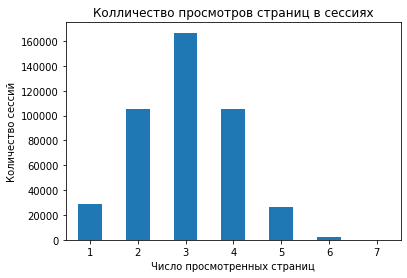

In [7]:
# Группируем данные по дате сессии для кол-ва просмотренных страниц
page_count_group = sessions_history.groupby('page_counter')['session_id'].agg('count').to_frame()
# Строим диаграмму
page_count_group.plot(kind='bar', legend = False, rot = 0)
plt.title('Колличество просмотров страниц в сессиях')
plt.xlabel('Число просмотренных страниц')
plt.ylabel('Количество сессий')

**По диаграмме выше можно отметить, что большее количество сессий наблюдается при просмотре трех страниц, примерно на одном и том же уровне по кол-ву сессий находятся количество страниц- 2 и 4**

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Анализ числа просмотренных страниц

---    
    
✅ Отлично, выбран правильный тип графика, а также добавлены название и подписи осей.

Преимущества такого подхода:
- Наглядность — столбчатая диаграмма хорошо подходит для сравнения дискретных данных.
- Читаемость — благодаря названию и подписям осей график легко интерпретировать.

Подробнее о выборе графиков можно прочитать в статье: [Matplotlib – Визуализация данных](https://matplotlib.org/stable/plot_types/index.html).

---

⚠️ Анализ числа просмотренных страниц отсутствует.

---

💬 Добавил аналитику по просмотрам
    
---
    
✅ Хорошо.    

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий от всех сессий по дням за весь период наблюдения.

In [8]:
# Добавляем в датасет столбец с маркером "кол-во страниц больше или равно 4"
sessions_history['good_session'] = sessions_history['page_counter'].apply(lambda x: 1 if x >= 4 else 0)

# Группируем данные по дате сессии с данными по кол-ву просмотренных страниц и кол-во просмотренных страниц>=4
session_group = sessions_history.groupby('session_date')[['session_id', 'good_session']].agg({'session_id' : 'count', 'good_session' : 'sum'})
session_group = session_group.rename(columns={'session_id': 'all_session'})
#Расчитываем долю успешных сессий
session_group['session_share'] = session_group['good_session'] / session_group['all_session']

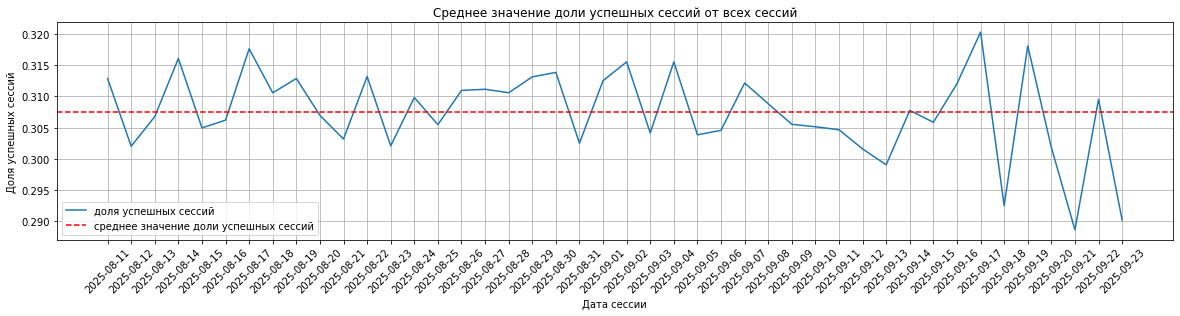

In [9]:
#Строим диаграмму доли зарегестрированных пользователей
plt.figure(figsize=(20,4))
x = session_group.index
y= session_group['session_share']
plt.plot(x,y, label= 'доля успешных сессий')
plt.axhline(y= session_group['session_share'].mean(), color='red', linestyle='--', label='среднее значение доли успешных сессий')
plt.xlabel('Дата сессии')
plt.ylabel('Доля успешных сессий')
plt.title('Среднее значение доли успешных сессий от всех сессий')
plt.xticks(rotation=45)
plt.grid(True) 
plt.show
plt.legend()

Среднее значение доли успешных сессий ко всем сессиям по дням равно 0,307 и следует отметить, что отклонение успешных сессий совсем небольшое: диапазон значений находится от 0,29 до 0,32. Однако на конец исследуемого периода следует отметить снижение доли успешных сессий с 0,31 до 0,29. 

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Доля пользователей, просмотревших более четырёх страниц

---    
    
⚠️  Хорошая работа с графиком! Но я рекомендую изменить масштаб оси Y — сейчас он задан в диапазоне от 0 до 1, что мешает рассмотреть реальные колебания метрики.

В нашем случае значения доли успешных сессий колеблются в пределах 0.28, 0.32, то есть изменения довольно тонкие, но важные. При текущем масштабе график визуально «сжат», и эти изменения становятся практически незаметными.

Такой подход часто используется в аналитике, особенно при работе с прокси-метриками: нас интересуют не абсолютные значения, а даже небольшие изменения во времени, ведь они могут сигнализировать о позитивных или негативных изменениях в продукте.
    
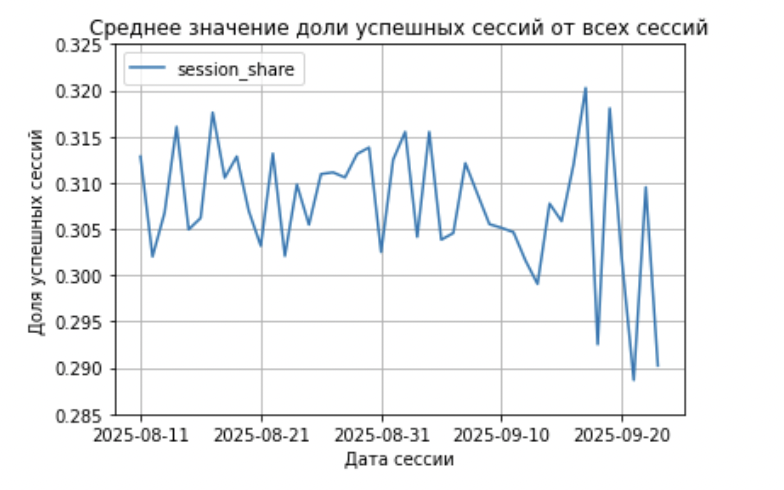   

---

💬 Перестроил граффик с более подробным отображением дней.

Добавил отображение среднего значения за период

Скорректировал шкалу по оси Y
    
---
    
✅ Супер.    

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Сформулировать нулевую и альтернативную гипотезы

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика рассчитать необходимую длительность проведения теста.

#### 2.1 Формулировка нулевой и альтернативной гипотез

Перед тем как проводить А/B-тест, необходимо сформулировать нулевую и альтернативную гипотезы. Напомним изначальное условие: команда разработчиков рекомендательных систем создала новый алгоритм, который, по их мнению, будет показывать более интересный контент для каждого пользователя.

О какой метрике идёт речь? Как она будет учтена в формулировке гипотез?

Формируем нулевую и альтернативную гипотезу:

- **H₀**: доля успешных сессий в тестовой группе B меньше или равна, чем в контрольной группе A.
- **H₁**: доля успешных сессий в тестовой группе B больше, чем в контрольной группе A.

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Формулировка статистических гипотез

----

⛔ Мы не проверям в тесте увеличение на 3%, мы проверям только то, что доля успешных сессий в тестовой группе B больше, чем в контрольной группе A.

Лучше записать так:
	
- H₀: доля успешных сессий в тестовой группе B меньше или равна, чем в контрольной группе A.
- H₁: доля успешных сессий в тестовой группе B больше, чем в контрольной группе A.
    
---

💬 Согласен. 

Пока опыта маловато для корректного формирования гипотиз. Обязательно пройду курс по аналитике от Я.Практикума

Скорректировал гипотезы как сказал
    
---
    
✅ 🤝    

#### 2.2. Расчёт размера выборки
В рамках курса вы уже рассчитывали размеры выборки и  использовали для этого онлайн-калькулятор. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки используйте метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [10]:
# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1-beta  # Мощность теста
p = 0.3 # Базовый уровень доли
mde = 0.03 * p  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p, p + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 41040


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Связь ошибки II рода и мощности критерия

---    

✅ Здорово, что связана ошибка второго рода и мощность критерия через `power = 1 - beta`. Это важный аспект статистического анализа, который помогает оценить вероятность обнаружения реального эффекта.  

Преимущества такого подхода:
- Позволяет осознанно выбирать размер выборки для теста.  
- Помогает сбалансировать риск ложных отрицательных результатов.  
- Улучшает интерпретацию результатов A/B-тестирования.  

Кстати, есть еще очень интересный бесплатный курс от Практикума по A/B-тестированию — там можно более детально познакомиться с расчетом длительности теста:  
[Practicum – Основы статистики](https://practicum.yandex.ru/profile/statistics-basic/)  

---

💬 Спасибо за наводки. Курс пройду обязательно

---
    
✅ Да, хороший курс, точно пригодится.    

#### 2.3. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [11]:
# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = ceil(user_registration['user_all'].mean())
print(f'Среднее количество пользователей приложения в день по историческим данным составляет {avg_daily_users}')

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size*2/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Среднее количество пользователей приложения в день по историческим данным составляет 9908
Рассчитанная длительность A/B-теста при текущем уровене трафика в 9908 пользователей в день составит 9 дней


**Рассчитанная длительность A/B-теста при текущем уровене трафика в 9908 пользователей в день составит 9 дней**


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Расчёт длительности A/B-теста

---

⛔️ В расчёте длительности теста не учтено, что A/B-тест состоит из двух групп (A и B).

Размер выборки используется только для одной группы, но необходимо учитывать обе, поэтому итоговое значение тестовой длительности будет заниженным.

Нужно умножить `sample_size` на 2 перед делением на `avg_daily_users`.

---

💬 Исправил
    
---
    
✅ Все правильно, но важно понимать, что это допустимый минимальный срок, однако для повышения надёжности результатов теста желательно провести его дольше — например, на 14 дней, чтобы сгладить возможные колебания в поведении пользователей по дням недели и собрать больше данных для анализа.    
    
В нашем случае тест длится - 20 дней, за счёт чего общее число участников увеличивается. Поэтому мощность теста остаётся высокой — 99.97%. Это значит, что вероятность не заметить реальный эффект крайне мала.    

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой будет видно возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [12]:
#Загружаем данные
sessions_test_part = pd.read_csv (PATH + 'sessions_project_test_part.csv' )

# Распределяем пользователей по группа A, B
user_group_A = sessions_test_part[sessions_test_part['test_group']=='A']
user_group_B = sessions_test_part[sessions_test_part['test_group']=='B']

#Расчитываем кол-во пользователей в каждой группе
gr_A = user_group_A['user_id'].nunique()
gr_B = user_group_B['user_id'].nunique()
user_per = abs(gr_A - gr_B)/gr_A*100

print(f'Процентная разница в количестве пользователей в группах A и B составляет {round(user_per,4)}%')

Процентная разница в количестве пользователей в группах A и B составляет 0.7448%


**За первый день тестирования наблюдается незначительная разница между двумя группами- 0,74%, значит группы А и В распределены примерно одинаково- то есть сопоставимы**

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">


##### ✅ Проверка распределения пользователей

---

✅ Эта проверка важна по нескольким причинам:
    
    
- Правильность разделения пользователей: Чтобы результат A/B-теста был корректным, важно убедиться, что группы A и B были случайным образом разделены, а не случайным образом или по какому-либо смещённому принципу. Если группы не были равномерно разделены, это может привести к ошибочным выводам, так как различия в поведении пользователей могут быть вызваны не тестируемым фактором, а изначальной неоднородностью групп.
- Корректность расчёта метрик: Мы проверяем, что метрики, такие как количество уникальных пользователей, корректно считаются для каждой из групп. Это важно, потому что любые ошибки в учёте пользователей могут исказить результаты теста и привести к неверным выводам о влиянии изменений на поведение пользователей.
- Обнаружение аномалий: Если процентная разница в количестве пользователей между группами слишком велика, это может свидетельствовать о проблемах с разделением пользователей, таких как технические ошибки или неправильное распределение. Проверка позволяет выявить такие аномалии на ранних стадиях теста и скорректировать процесс.
- Убедительность результатов: Важно, чтобы тест был честным и справедливым. Если группа A имеет значительное преимущество по численности, то результаты могут быть искажены. Это проверка помогает удостовериться, что эксперимент был проведён корректно, и что его результаты можно использовать для объективных выводов.

---

💬 Добавил описание результатов

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах, полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [13]:
#Проверяем пересечения пользователей в группах A, B
int_df = len(sessions_test_part.groupby('user_id').agg({'test_group': 'nunique'}).query('test_group > 1'))

print(f'Количество пересечений пользователей в группах A и B = {int_df}')

if int_df>0:
    print('Пользователи которые попадают в обе группы:')
    display(sessions_test_part.groupby('user_id').agg({'test_group': 'nunique'}).query('test_group > 1'))

Количество пересечений пользователей в группах A и B = 0


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Проверка пересечений пользователей между группами

---

✅ Альтернативный способ — использовать группировку, что может быть полезно при работе с большими данными:

```py
sessions_test_part.groupby('user_id').agg({'test_group': 'nunique'}).query('test_group > 1')
```

Этот метод позволяет сразу отфильтровать пользователей, которые встречаются в обеих группах.

---

💬 Согласен. Исправил.

Так же добавил отображение пользователей которые попали в обе группы если таковые имеются

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройств и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


Text(0, 0.5, 'Тип устройства')

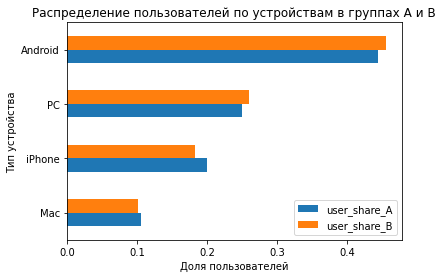

In [14]:
# Группируем пользователей по типу устройств для каждой группы
user_group_A_device = user_group_A.groupby(['user_id', 'device'])['session_id'].agg('count').reset_index().groupby('device')['user_id'].agg('count').to_frame().sort_values(by = 'user_id', ascending=True)
user_group_B_device = user_group_B.groupby(['user_id', 'device'])['session_id'].agg('count').reset_index().groupby('device')['user_id'].agg('count').to_frame().sort_values(by = 'user_id', ascending=True)
# Расчитываем долю типа устройств относительно всех пользователей для каждой группы
user_group_A_device['user_share']=user_group_A_device['user_id']/user_group_A_device['user_id'].sum()
user_group_B_device['user_share']=user_group_B_device['user_id']/user_group_B_device['user_id'].sum()

#Объединяем полученные данные каждой группы в один датасет
user_device = user_group_A_device.join(user_group_B_device, on = 'device', lsuffix='_A', rsuffix='_B')

#Строим диаграмму распределения
user_device.plot(kind='barh', y = ['user_share_A', 'user_share_B'], legend = True, rot = 0)
plt.title('Распределение пользователей по устройствам в группах A и B')
plt.xlabel('Доля пользователей')
plt.ylabel('Тип устройства')

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


Text(0, 0.5, 'Регион')

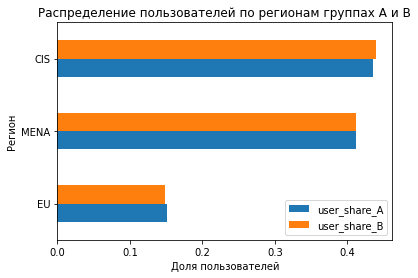

In [15]:
# Группируем пользователей по региону для каждой группы
user_group_A_device = user_group_A.groupby(['user_id', 'region'])['session_id'].agg('count').reset_index().groupby('region')['user_id'].agg('count').to_frame().sort_values(by = 'user_id', ascending=True)
user_group_B_device = user_group_B.groupby(['user_id', 'region'])['session_id'].agg('count').reset_index().groupby('region')['user_id'].agg('count').to_frame().sort_values(by = 'user_id', ascending=True)
# Расчитываем долю пользователей в регионе относительно всех пользователей для каждой группы
user_group_A_device['user_share']=user_group_A_device['user_id']/user_group_A_device['user_id'].sum()
user_group_B_device['user_share']=user_group_B_device['user_id']/user_group_B_device['user_id'].sum()

#Объединяем полученные данные каждой группы в один датасет
user_device = user_group_A_device.join(user_group_B_device, on = 'region', lsuffix='_A', rsuffix='_B')

#Строим диаграмму распределения
user_device.plot(kind='barh', y = ['user_share_A', 'user_share_B'], legend = True, rot = 0)
plt.title('Распределение пользователей по регионам группах A и B')
plt.xlabel('Доля пользователей')
plt.ylabel('Регион')

Глядя на распределение долей по типам устройств и регионам в двух группах, можно сделать вывод о том, что распределения двух групп совпадают

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Равномерность разделения 

---

✅ Все правильно, обязательно стоит проверять равномерность распределения, даже если в целом группы получились почти 50/50 по пользователям.

Проверка равномерности по количеству пользователей в группах — это один срез, но распределение по устройствам/регионам — это уже другие факторы, которые могут повлиять на поведение пользователей. 

Например, пользователи Android и iOS могут по-разному конвертировать или тратить деньги.

Даже при идеально ровном делении пользователей (50/50) может оказаться, что в одной группе больше пользователей с iPhone, а в другой — с Android. И вот тогда уже не ясно: различие в метриках возникло из-за A/B-теста или из-за устройства?

---

💬 Добавил описательную часть получившихся результатов

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Было ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение: корректно ли проходит A/B-тест, или наблюдаются какие-либо нарушения.

На основе проведённого анализа A/B-теста можно сделать следуюшие выводы:

- различия в колличестве пользователей в группах A и B незначительно и составляет **`0.7448%`**.

- Так как пересечение пользователей в группах не обнаружено. **`Выборки являются независимыми`**.

- По региона и типам устройств не наблюдается значительного расхождения. **`Данные групп A и B распределены равномерно.`**

**Итоговое заключение по промежуточным результатам теста:**

***Группа A и группа B соспоставимы. Тест проходит корректно***


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Заключение о корректности A/B-теста

---

⚠️ В выводе нет главного заключения — «Сделайте заключение о том, корректно ли проходит A/B-тест». Это ключевой пункт задания, и он обязательно должен быть сформулирован аналитиком чётко и однозначно, без возможности двойной трактовки или дополнительных интерпретаций со стороны заказчика.

---    

💬 Добавил вывод
    
---
    
✅ Все правильно.    

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [16]:
#Загружаем данные
sessions_test = pd.read_csv (PATH + 'sessions_project_test.csv' )
# Добавляем в датасет столбец с маркером "кол-во страниц больше или равно 4"
sessions_test['good_session'] = sessions_test['page_counter'].apply(lambda x: 1 if x >= 4 else 0)

#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимыми. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [17]:
#Сформулируем гипотезу:
#- H0: среднее значение дневнных сессий не различается в двух выборках
#- H1:среднее значение дневнных сессий различается в двух выборках

#Распределяем пользователей по группам
user_group_A_test = sessions_test[sessions_test['test_group']=='A']
user_group_B_test = sessions_test[sessions_test['test_group']=='B']
# Группируем кол-во сессий по дате сессии для каждой группы
sessions_group_A = user_group_A_test.groupby('session_date')['session_id'].nunique().to_frame()
sessions_group_B = user_group_B_test.groupby('session_date')['session_id'].nunique().to_frame()

# Расчитываем кол-во сессий в каждой группе
session_count_group_A = sessions_group_A['session_id'].sum()
session_count_group_B = sessions_group_B['session_id'].sum()

results = st.ttest_ind(sessions_group_A, sessions_group_B, alternative= 'two-sided') 

p_value = results.pvalue
print(p_value)

if p_value > alpha:
    print('Нулевая гипотеза о равенстве среднего количества сессий в двух группах не может быть опровергнута')
else:
    print('Нулевая гипотеза о равенстве среднего количества сессий в двух группах опровергается')

[0.9382193]
Нулевая гипотеза о равенстве среднего количества сессий в двух группах не может быть опровергнута


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Формулировка гипотез перед статистическим тестом

---

✅ Молодец, что перед проверкой теста  формулируешь нулевую (H₀) и альтернативную (H₁) гипотезы. Так понятно, какие различия мы проверяем.


Подробнее можно почитать [здесь](https://allatambov.github.io/psms/pdf/hypo-test.pdf)    


---

💬 Спасибо. Хороший материал. Положил в закладки
    
---
    
✅ 🤝    

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [18]:
# Группируем данные по группам A, B. Расчитываем общее кол-во сессий, кол-во успешных сессий
good_session_share_by_group= sessions_test.groupby(['test_group']).agg({'session_id': 'nunique', 'good_session' :'sum'}).reset_index()
good_session_share_by_group['good_session_share'] = good_session_share_by_group['good_session'] / good_session_share_by_group['session_id']
# Расчитываем среднее значение успешности сессий для каждой группы
share_good_A= sessions_test[sessions_test['test_group']=='A']['good_session'].mean()
share_good_B= sessions_test[sessions_test['test_group']=='B']['good_session'].mean()

metric_good= round(abs(share_good_A-share_good_B)*100,2)
print(f'Долея успешных сессий в группе A составляет {round(share_good_A*100,2)}%')
print(f'Долея успешных сессий в группе B составляет {round(share_good_B*100,2)}%')
print(f' разница долей успешных сессий в двух группах составляет {metric_good}%')

Долея успешных сессий в группе A составляет 30.77%
Долея успешных сессий в группе B составляет 31.83%
 разница долей успешных сессий в двух группах составляет 1.06%


<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Расчёт доли успешных сессий

---

✅ Все правильно. Сравнение доли успешных сессий — важный шаг, потому что именно эта метрика показывает, насколько эффективно пользователи достигают целевого действия при взаимодействии с продуктом.
 
Если доля успешных сессий в одной из групп выше, это может говорить о том, что изменения, протестированные в этой группе, положительно повлияли на пользовательский опыт. А значит, они могут быть внедрены в основную версию продукта.

Без такой проверки невозможно оценить реальное влияние нововведения — даже если распределение сессий по группам было корректным.

---

💬 Здесь можно оставить комментарий

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [19]:
#Сформулируем гипотезу:
#- H0: долей успешных сессий в двух группах значимо не различается в двух выборках
#- H1:долей успешных сессий в двух группах значимо различается в двух выборках

m_a = sessions_test[sessions_test['test_group']=='A']['good_session'].sum()
m_b = sessions_test[sessions_test['test_group']=='B']['good_session'].sum()
n_a = sessions_test[sessions_test['test_group']=='A'].shape[0]
n_b= sessions_test[sessions_test['test_group']=='B'].shape[0]
p_a= m_a/n_a 
p_b =m_b/n_b
ztest_result, p_value = proportions_ztest([m_b,m_a],[n_b,n_a], alternative='larger')


print(p_value)
if p_value > alpha:
    print(f'Нулевая гипотеза о том что, доли успешных сессий в двух группах значимо не различается в двух выборках, не может быть опровергнута')
else:
    print(f'Нулевая гипотеза о том что, доли успешных сессий в двух группах значимо не различается в двух выборках,  опровергается')

0.0001574739988036123
Нулевая гипотеза о том что, доли успешных сессий в двух группах значимо не различается в двух выборках,  опровергается


<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Формулировка статистических гипотез

----
    
⚠️ Формулировки гипотез не соответствуют коду

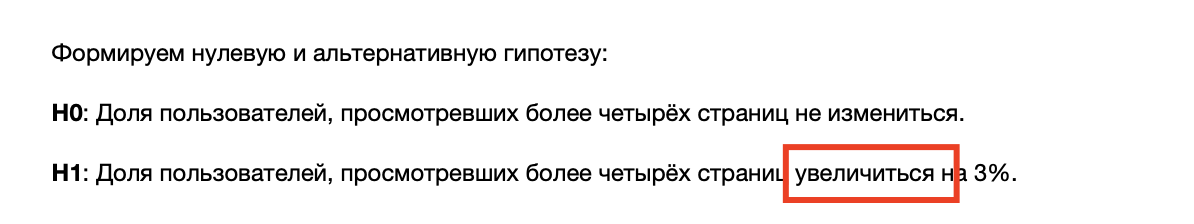
    
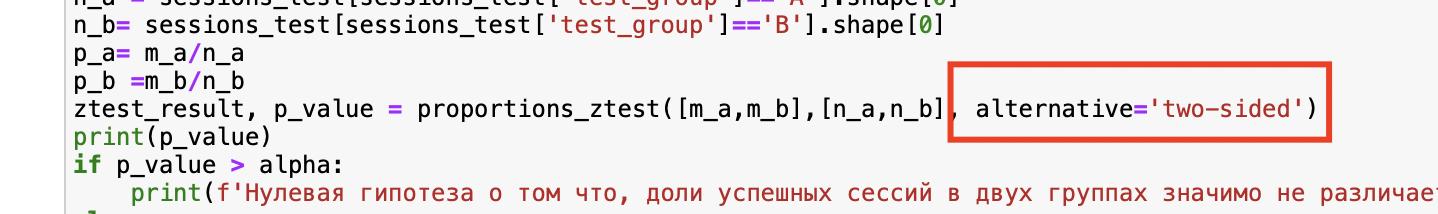    
    
---

**🔘 Дано**
- B — метрика в **тестовой группе**. Это группа, на которой проводится эксперимент или изменение.     
- A — метрика в **контрольной группе**. Это группа, которая не подвергается изменению. Она служит для сравнения, чтобы понять, как изменение в тестовой группе повлияло на результаты. 

---

**Порядок аргументов (имеет значение) - Так должно быть. ✅**

Например, если ты проверяешь: B > A, то порядок аругуметов такой:

`test(B, A, alternative='greater/larger')`

**Тестовая группа идет всегд первой, контрольная второй.**

Если ты случайно поменяешь местами группы, изменится смысл теста.

---

**Проверка на различие (двусторонняя) - Так сейчас в коде гипотезах. ⚠️**

- H₀: B = A
- H₁: B ≠ A

`test(μA, A, alternative='two-sided')` (по умолчанию в большинстве библиотек)

Применяй, если не знаешь, в какую сторону будет отличие.


---

**Проверка на увеличение (cтало лучше или больше) - Так должно быть. ✅**

- H₀: B ≤ A
- H₁: μA > A

`test(B, A, alternative='greater/larger')`

Применяй, если ожидаешь, что B больше чем A.

---

💬 Исправил, но не уверен что правильно.
    
----
    
✅ Все отлично, молодец!    

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять нововведение в приложение.

- **Характеристики проведённого эксперимента:**
    - **Количество задействованных пользователей:** В тесте участвовало в районе 100 000 пользователей (49 551 в группе A и 50 454 в группе B).  
    - **Длительность эксперимента:** Тест проводился с 14 октября по 2 ноября 2025 года (20 дней).  

- **Влияние нового алгоритма рекомендаций на ключевую метрику:**  
Ключевая метрика — **доля успешных сессий** (просмотр 4 и более страниц за сессию):
    - В группе A: **30.77%**.  
    - В группе B: **31.83%**.  
    - **Разница между группами:** **1.06%** в пользу группы B.  

- **Статистическая значимость:**  
    - **Значение p-value:** **0.0002** (меньше уровня значимости 0.05).  
    - **Вывод:** Различие в долях успешных сессий между группами **статистически значимо**.  

- **Рекомендация:**  
Новый алгоритм рекомендаций **увеличил долю успешных сессий на `1.06%`**, и этот эффект подтверждён статистически.    


- **Итоговое решение:**  
    - **Внедрять алгоритм** можно.

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

##### ✅ Итоговый аналитический вывод

---
     
✅ Правильный расчет. Видно, что метрика улучшилась, и тест это подтвердил, что говорит об успешности A/B-эксперимента! 🎯   
    
---
    
⚠️ Стоит учитывать, что из-за осторожного подхода можно упустить потенциальную прибыль. Даже небольшое, но статистически значимое улучшение в одной из ключевых метрик может привести к росту доходов в долгосрочной перспективе. Если тест демонстрирует положительную динамику и статистическую значимость, имеет смысл рассмотреть внедрение, особенно если дальнейшая оптимизация способна усилить эффект.

Конечно, важно анализировать и другие показатели, но полное исключение изменений из-за незначительного прироста может замедлить развитие продукта и снизить конкурентоспособность. 

---

💬 Скорректировал итоговые выводы
    
---
    
✅ Согласен.    

<!-- ✅⚠️⛔❌🚩 -->
<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    
## 🏁 **Итоги ревью**
<a id="results"></a>
[В начало](#start)

---

⛔️ Павел, спасибо за работу. Осталось исправить несколько комментариев и можно идти к заказчику. Молодец! 👍
    
Для удобства, комментарии которые нужно скорректировать я добавил в меню **Contents** слева.
    
Жду новую версию проекта. 🙂

---

💬 Отличное ревью. Спасибо.

Узнал много нового.
    
---
    
✅ Рад, что понравилось. А теперь о главном... ;)    

<div style="background-color: black; border: 2px solid #444; border-radius: 20px; padding: 15px 25px; display: inline-block; color: white;">

## ✌️ **Павел, поздравляю - проект принят!** 🥳 🎉 
    
Ты молодец! 

💪 Еще раз спасибо за хорошую работу, твои комментарии и внесенные корректировки! Критических замечаний нет. Если у тебя есть вопросы, их можно задать через куратора.
    
**Успехов в дальнейшем обучении и карьере! 🚀**

**Артем 🤝**    

<img src="https://lifeo.ru/wp-content/uploads/gif-salyut-10.gif"> 
    
---
    
## 📖 **Полезные ссылки**

* [Работа в Яндексе](https://yandex.ru/jobs/pages/analytics_interview?ysclid=l84s63fs1g790141490)
* [Настройте свой Jupyter Notebook правильно](https://medium.com/nuances-of-programming/настройте-свой-jupyter-notebook-правильно-faef14c89434)    
* [PEP 8 – Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)    
* [Обработка пропусков в данных](https://loginom.ru/blog/missing)  
* [Разделение данных с помощью qcut и cut в Pandas](https://dfedorov.spb.ru/pandas/Разделение%20данных%20в%20Pandas%20с%20помощью%20qcut%20и%20cut.html?)  
* [Официальная документаци метода qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
* [Подробное руководство по группировке и агрегированию с помощью pandas](https://dfedorov.spb.ru/pandas/Подробное%20руководство%20по%20группировке%20и%20агрегированию%20с%20помощью%20pandas.html?ysclid=lcmm6rtg2w602526506)
* [Проверка статистических гипотез. (21 мая 2020 г.)](https://allatambov.github.io/psms/pdf/hypo-test.pdf)    
* [Шпаргалка по визуализации данных в Python с помощью Plotly](https://habr.com/ru/articles/502958/) 
* [Тест гигиены визуализации данных](https://bar-or-pie.dianov.org)    
* [Задачки SQL](https://habr.com/ru/company/dcmiran/blog/500360/)    
* [7 cайтов для оттачивания навыка написания SQL запросов на 2020 год](https://techrocks.ru/2019/11/22/7-sites-to-perfect-sql-query-writing-skills/)
* [Главред помогает очистить текст от словесного мусора, проверяет на соответствие информационному стилю.](https://glvrd.ru)

</div>